In [1]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt


In [70]:

# data = np.random.uniform(-1, 1, 500)
data = pd.read_csv("../dict_spandan/dict_new_p5_2.csv")
print(data.head())
print(data.columns)
# data['Frequency'] = (data['Frequency'] / data['Frequency'].max() )* 32767
print(data['Frequency'])
data_resampled = resample(data['Frequency'].astype(int), 44100)

wavfile.write('freq-p1.wav', 44100, data_resampled)

   Time Frame  Frequency
0           0     1986.0
1           1     1921.5
2           2     2050.5
3           3     2050.5
4           4     2072.0
Index(['Time Frame', 'Frequency'], dtype='object')
0       1986.0
1       1921.5
2       2050.5
3       2050.5
4       2072.0
         ...  
1063    1986.0
1064    1986.0
1065    1964.5
1066    2050.5
1067    2050.5
Name: Frequency, Length: 1068, dtype: float64


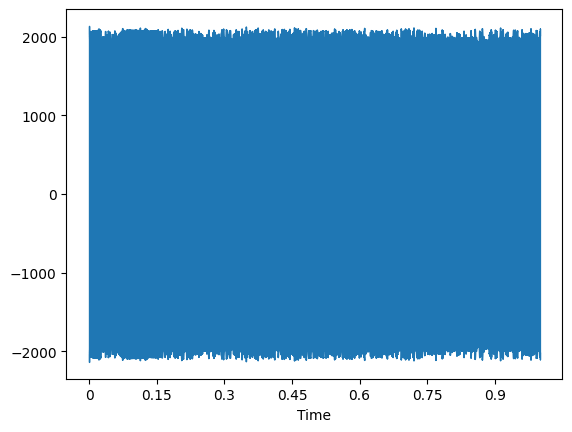

In [71]:
# Load the audio data
y, sr = librosa.load('../my-env/freq-p1.wav')

# Display the waveform
librosa.display.waveshow(y, sr=sr)
plt.show()

In [54]:
ipd.Audio("../my-env/audio.wav")

In [72]:
print(f'y: {len(y)}')
print(f'y: {y}')
print(f'shape: {y.shape}')

y: 22050
y: [1467.6953 2136.7642 1883.5488 ... 2024.7725 1944.1592 2103.1272]
shape: (22050,)


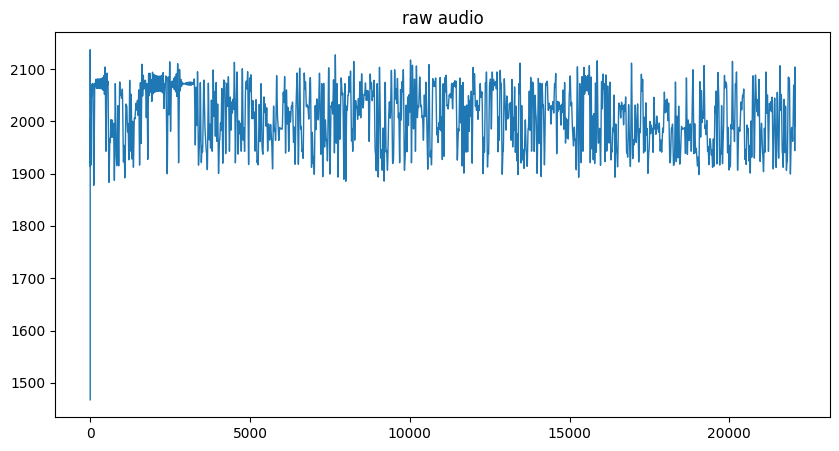

In [73]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title="raw audio")
plt.show()

In [74]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 44)

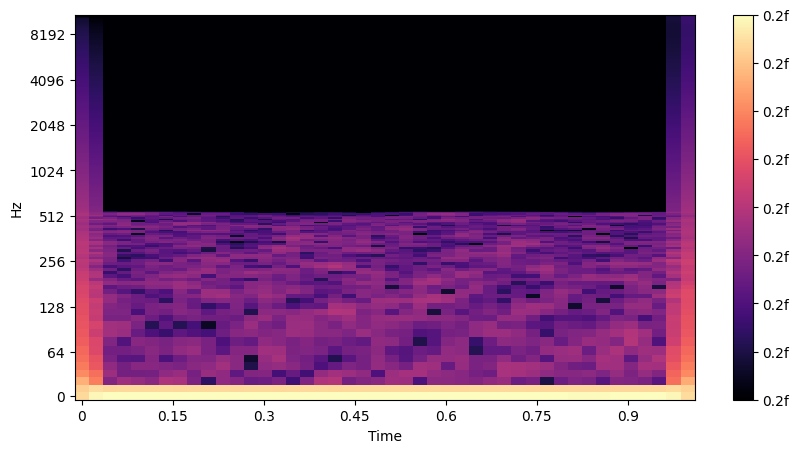

In [75]:
# plot the tranformed audio

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis = 'log',
                               ax=ax)
fig.colorbar(img, ax=ax, format=f'0.2f')
plt.show()

In [76]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)

S.shape

(128, 44)

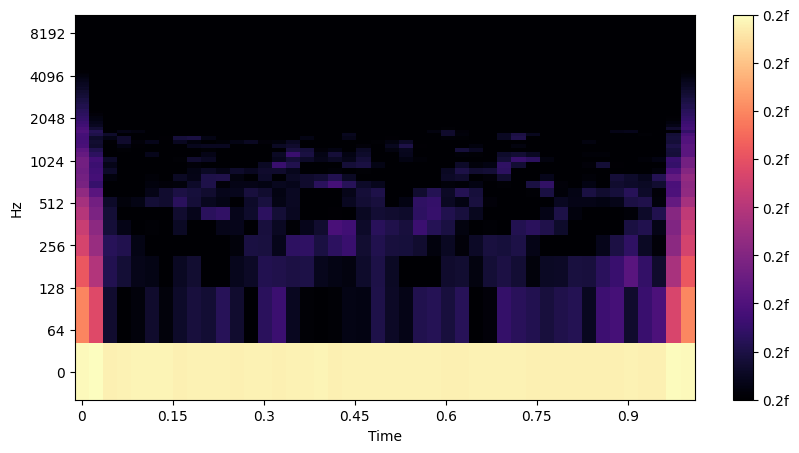

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis = 'log',
                               ax=ax)
fig.colorbar(img, ax=ax, format=f'0.2f')
plt.show()

In [ ]:
df = pd.read_csv("")